# Введение в TensorFlow

In [1]:
import numpy as np
import tensorflow as tf

/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Убедимся, что у нас всё установлено правильно

In [2]:
hello = tf.constant('Hello, TensorFlow!') # создаем объект из TF

# создаем сессию
with tf.Session( ) as sess:
    print(sess.run(hello)) #сессия "выполняет" объект

b'Hello, TensorFlow!'


# 1. Основы основ

Работа с билиотекой строится вокруг построения и выполнения **графа вычислений**. Обычно в tensorflow сначала создают струкртуру для вычислений, а после выполняют её. Вычислительные графы выполняются в сессиях.

## 1.1 Граф вычислений 

Основной объект в tensorflow - это **тензор.** Или многомрный массив чисел.  Давайте попробуем создать тензор, заполненный нулями. 

In [3]:
np.zeros([3,3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [4]:
zeros_tensor = tf.zeros([3, 3])
zeros_tensor

<tf.Tensor 'zeros:0' shape=(3, 3) dtype=float32>

Чтобы увидеть значение тензора, его нужно выполнить. До выполнения это всего лишь вычислительный граф. Не более того. 

In [5]:
sess = tf.InteractiveSession( )
zeros_tensor.eval()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

Над тензорами можно совершать разнообразные операции.В примере ниже мы используем конструкцию `sess.run` — это метод исполнения операций графа в сессии. 

В первой строчке я создал тензор из усеченного нормального распределения. Для него используется стандартная генерация нормального распределения, но из него исключается всё, что выпадает за пределы двух стандартных отклонений. Помимо этого генератора есть равномерное, простое нормальное, гамма и еще несколько других распределений. 

Второй тензор — это заполненный значением 0.5 многомерный массив размера 2х2 и это что-то похожее на numpy и его функции создания многомерных массивов.

In [6]:
a = tf.truncated_normal([2, 2])
b = tf.fill([2, 2], 0.5)

print(sess.run(a + b))
print(sess.run(a - b))
print(sess.run(a * b))
print(sess.run(tf.matmul(a, b)))

[[ 0.3370055  -0.55695283]
 [ 0.00729492 -0.30737752]]
[[-0.66694856 -1.1193707 ]
 [-0.34533173 -0.07189259]]
[[-0.23034303  0.01685248]
 [-0.5048349   0.25292784]]
[[ 0.15663433  0.15663433]
 [-1.1029818  -1.1029818 ]]


In [7]:
c = a + b
c.eval()

array([[-0.90736914,  0.51043695],
       [ 0.36466607, -0.7734933 ]], dtype=float32)

Следущий важный объект в tensorflow это **переменная.** Она представляет из некоторый буфер в памяти, который содержит текущие тензоры. 

In [7]:
v = tf.Variable(zeros_tensor)
v

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32_ref>

Переменная участвует в вычислениях в качестве узла вычислительного графа, сохраняет состояние, и ей нужна какая-нибудь инициализация. Так, если в следующем примере обойтись без первой строчки, то TF выкинет исключение.

In [8]:
sess.run(v.initializer)
v.eval()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

Операции над переменными создают вычислительный граф, который можно потом выполнить. 

Последний важный объект tensorflow это **плейсхолдеры.** — объекты, которые параметризуют граф и отмечают места для подстановки внешних значений. Как написано в официальной документации, плейсхолдер — это обещание подставить значение потом. Плейсхолдерам и переменным, кстати говоря, можно давать имена.

In [9]:
x = tf.placeholder('float32', name = 'Jack')
f =  1 + 2 * x + tf.pow(x, 2)

sess.run(f, feed_dict={x: 10})

121.0

Итак, в этой части тетрадки мы познакомились с такими объектами tensorflow, как 

* граф вычислений 
* тензор 
* переменная
* заглушка 

Давайте закрепим это и выполним небольшое задание. А именно, попробуем реализовать среднюю квадратичную ошибку и сигмоиду.

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [10]:
## Ваш код для сигмоиды

In [11]:
x = tf.placeholder(dtype=tf.float32)
sigma = 1 / (1 + tf.exp(-x))

In [12]:
sigma.eval(feed_dict={x: np.linspace(-1, 1, 10)})

array([0.26894143, 0.314799  , 0.36457646, 0.41742977, 0.4722508 ,
       0.52774924, 0.5825702 , 0.6354236 , 0.685201  , 0.7310586 ],
      dtype=float32)

$$ MSE(\hat y, y) = \sum_{i=1}^n (\hat y - y)^2 $$

In [13]:
## Ваш код для MSE 

In [14]:
y_true = tf.placeholder("float32", shape=(None,), name="y_true")
y_predicted = tf.placeholder("float32", shape=(None,), name="y_predicted")
mse = tf.reduce_mean((y_true - y_predicted)**2)

In [15]:
mse.eval({y_true: [1,2,3,4,5], y_predicted: [5,4,3,2,1]})

8.0

## 1.2 Производные да градиенты

Тензорфлоу может вычислять производные и градиенты автоматически. Градиенты вычисляютя по цепному правилу: 

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Пакет может получить производную любого графа, заданного в нём.

In [16]:
my_scalar = tf.placeholder('float32')

scalar_squared = my_scalar**2

# производная scalar_squared по my_scalar
derivative = tf.gradients(scalar_squared, [my_scalar, ])

In [17]:
derivative

[<tf.Tensor 'gradients/pow_1_grad/Reshape:0' shape=<unknown> dtype=float32>]

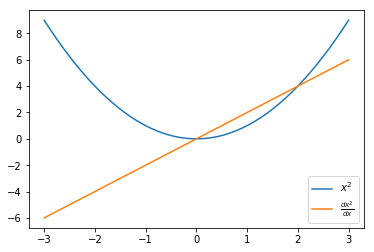

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

with tf.Session( ) as sess:
    x = np.linspace(-3, 3)
    x_squared, x_squared_der = sess.run([scalar_squared, derivative[0]],
                                     {my_scalar:x})

plt.plot(x, x_squared,label="$x^2$")
plt.plot(x, x_squared_der, label=r"$\frac{dx^2}{dx}$")
plt.legend();

Почему это круто? 

In [19]:
my_vector = tf.placeholder('float32', [None])

# Найдём производную следующей дичи по my_scalar и my_vector
weird_psychotic_function = tf.reduce_mean(
    (my_vector+my_scalar)**(1+tf.nn.moments(my_vector,[0])[1]) + 
    1./ tf.atan(my_scalar))/(my_scalar**2 + 1) + 0.01*tf.sin(
    2*my_scalar**1.5)*(tf.reduce_sum(my_vector)* my_scalar**2
                      )*tf.exp((my_scalar-4)**2)/(
    1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2)
                                    )/(1+tf.exp(-(my_scalar-4)**2)))**2

der_by_scalar = tf.gradients(weird_psychotic_function, my_scalar)
der_by_vector = tf.gradients(weird_psychotic_function, my_vector)

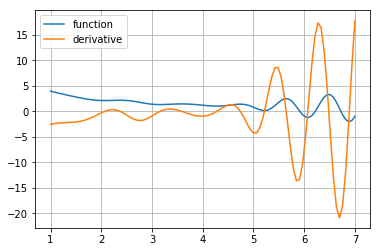

In [20]:
scalar_space = np.linspace(1, 7, 100)

with tf.Session( ) as sess:
    y = [sess.run(weird_psychotic_function, {my_scalar:x, my_vector:[1, 2, 3]})
         for x in scalar_space]

    y_der_by_scalar = [sess.run(der_by_scalar,
                             {my_scalar:x, my_vector:[1, 2, 3]})
                       for x in scalar_space]

plt.plot(scalar_space, y, label='function')

plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid()
plt.legend();

# 2. Собираем логистическую регрессию

Напишем небольшую функцию для динамической визуализации обучения.

In [21]:
from IPython import display

def visualize(l1,l2, h1, h2):
    plt.figure(figsize=(20,5)) 
    epo_range = range(1,len(h1)+1)
    tick_range = range(1,len(h1)+1,2)
    plt.subplot(1,2,1)
    plt.title('Learning loss')
    plt.plot(epo_range,l1, label='train set')
    plt.plot(epo_range,l2, label='valid set')
    plt.grid()
    plt.xticks(tick_range)
    plt.legend(title = 'Loss at:')
    
    plt.subplot(1,2,2)
    plt.title('Learning accuracy')
    plt.plot(epo_range,h1, label='train set')
    plt.plot(epo_range,h2, label='valid set')
    plt.grid()
    plt.xticks(tick_range)
    plt.ylim(0, 1.)
    plt.legend(title = 'Accuracy at:')
    
    display.clear_output(wait=True)
    plt.show()

Подгрузим датасет

In [22]:
import keras

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # нормализация матриц
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # последние 10000 примеров из трэйна оставим для валидации
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

Using TensorFlow backend.


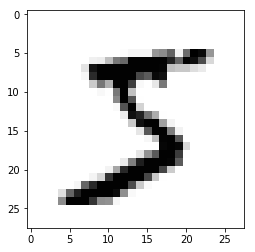

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [24]:
# сделаем OHE для таргета
def one_hot(y):
    return np.eye(10)[y]

y_train = one_hot(y_train)
y_val = one_hot(y_val)
y_test = one_hot(y_test)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [25]:
# а также решэйп целевых переменных 
X_train = X_train.reshape(X_train.shape[0],28**2)
X_val = X_val.reshape(X_val.shape[0],28**2)
X_test = X_test.reshape(X_test.shape[0],28**2)
X_test.shape

(10000, 784)

Собираем граф под логистическую регрессию.

In [26]:
epochs = 100       # число эпох для обучения 
batch_size = 100   # размер одного батча 

# для удобства размерность каждого входа 
order = X_train.shape[1] 

# создаём две заглушки для входных данных 
input_X = tf.placeholder(name='input', shape=[None, order],dtype = tf.float32)
input_y = tf.placeholder(name='output', shape=[None,10],dtype = tf.float32) # 0-9 цифры => 10 classes

# создаем переменные, которые мы будем обновлять на каждой итерации в ходе обучения
W = tf.Variable(tf.random_normal([order,10]), name ='weights')
b = tf.Variable(tf.zeros([10]), name = 'constant')

# прогнозы будут собираться в результате применения softmax 
pred = tf.nn.softmax(tf.matmul(input_X, W) + b) 

# потери будем считать по logloss
loss = tf.reduce_mean(-tf.reduce_sum(input_y*tf.log(pred), reduction_indices=1)) 

# будем на каждой итерации подсчитывать accuracy 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# в качестве оптимизатора возьмём momentum 
optimizer = tf.train.MomentumOptimizer(0.1, 0.5).minimize(loss, var_list=[W, b])

Теперь давайте чуть подробнее посмотрим что делает эта программа

1. Мы объявили placeholder для переменных X и y. На этом этапе уже нужно задать им размерность.
2. Мы инициализировали переменные W и b. Это переменные tensorflow, которые пока никаких значений не имеют, но будут инициализированы стандартным нормальным распределением для W и нулём для b.
3. Задаём суть модели, а именно функцию ошибок. Обратите внимание на функцию `reduce_sum`: на входе она всего лишь подсчитывает сумму матрицы по строчкам, но пользоваться надо именно ею, а не обычной суммой или соотвествующими функциями из numpy, потому что TensorFlow сможет куда более эффективно оптимизировать процесс вычислений. 
4. Вводим переменную `optimizer` - оптимизатор, то есть собственно алгоритм, который будет подсчитывать градиенты и обновлять веса. 

Теперь запишем большой цикл, который будет осуществлять обновления весов. То есть как раз вычислять переменную `optimizer`. На каждой итерации цикла мы берём случайное подмножество из `batch_size` элементов и подсчитываем значения нужных переменных. Мы подаём в функцию `sess.run` список переменных, которые нужно подсчитать и словарь `feed_dict`, в который записываем значения входных переменных, обозначенных ранее как `tf.placeholder`. 

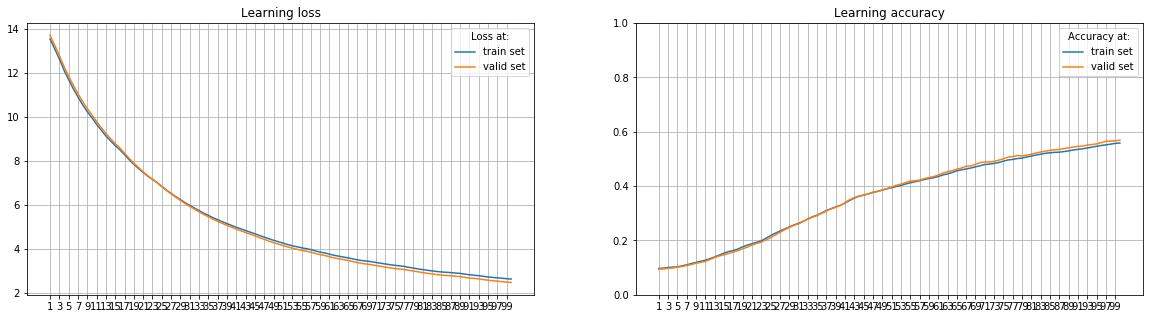

In [27]:
s = tf.InteractiveSession()
s.run(tf.global_variables_initializer())
np.random.seed(42)

loss_test, loss_train  = [ ], [ ]
acc_test, acc_train = [ ], [ ]
for i in range(epochs):
    # выбираем рандомный батч
    ind = np.random.choice(X_train.shape[0], batch_size)
    s.run(optimizer, {input_X: X_train[ind,:], input_y: y_train[ind]})
    # находим потери
    loss_train.append(s.run(loss, {input_X: X_train, input_y: y_train}))
    loss_test.append(s.run(loss, {input_X: X_val, input_y: y_val}))
    # находим точность
    acc_train.append(s.run(accuracy, {input_X: X_train, input_y: y_train}))
    acc_test.append(s.run(accuracy, {input_X: X_val, input_y: y_val}))
    # визуализируем
    visualize(loss_train, loss_test, acc_train, acc_test) 

Обратите внимание, что TensorFlow очень чуствительна к размерностям. Например, чтобы работала функция `matmul`, нужно подать ей на вход обязательно матрицы. Даже если это матрица размера $1 \times 1$.

Также обратите внимание, что вместо `with tf.Session() as sess` можно писать `sess = InteractiveSession()` и пользоваться переменной sess как постоянной открытой сессией.

Посмотрим на тестовой выборке, насколько хорошо нам удалось обучить модель.

In [28]:
print("Точность: %s" %s.run(accuracy, {input_X: X_test, input_y: y_test}))

Точность: 0.5721


## 3. Наша первая нейронная сеть на TensorFlow

Давайте добавим в ту же оздель один скрытый слой. Будем использовать в нём $100$ нейронов. 

In [29]:
# параметры 
epochs = 100
batch_size = 500
num_hidd_units = 100 # число нейронов в скрытом слое
lr = 0.005 # скорость обучения

# для удобства размерность каждого входа 
order = X_train.shape[1] 

# создаём две заглушки для входных данных 
input_X = tf.placeholder(name='input', shape=[None, order],dtype = tf.float32)
input_y = tf.placeholder(name='output', shape=[None,10],dtype = tf.float32) # 0-9 цифры => 10 classes

# Первый слой 
weights_1 = tf.Variable(tf.random_normal([order,num_hidd_units],stddev=0.01), name ='weights_1')
b_1 = tf.Variable(tf.random_normal([num_hidd_units]), name = 'constant_1')

# relu активация для перого слоя
h = tf.nn.relu(tf.add(tf.matmul(input_X, weights_1),b_1)) 

# добавим слой дропаута, создадим для вероятности выключения нейрона placeholder
keep_probability = tf.placeholder(tf.float32)

# добавляем слой дропаута
h_drop = tf.nn.dropout(h, keep_probability)


# Второй слой 
weights_2 = tf.Variable(tf.random_normal([num_hidd_units, 10],stddev=0.01), name ='weights_2')
b_2 = tf.Variable(tf.random_normal([10]), name = 'constant_2')

# softmax для второго слоя
pred = tf.nn.softmax(tf.add(tf.matmul(h_drop, weights_2), b_2))

# подсчитываем accuracy 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# функция потерь
loss = -tf.reduce_mean(tf.reduce_sum(input_y * tf.log(pred)
                         + (1 - input_y) * tf.log(1 - pred), axis=1))

# Разные оптимизаторы 
optimizer = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)
#optimiser = tf.train.GradientDescentOptimizer(learning_rate = lr).minimize(loss)
#optimiser = tf.train.MomentumOptimizer(0.5, 0.9).minimize(loss)

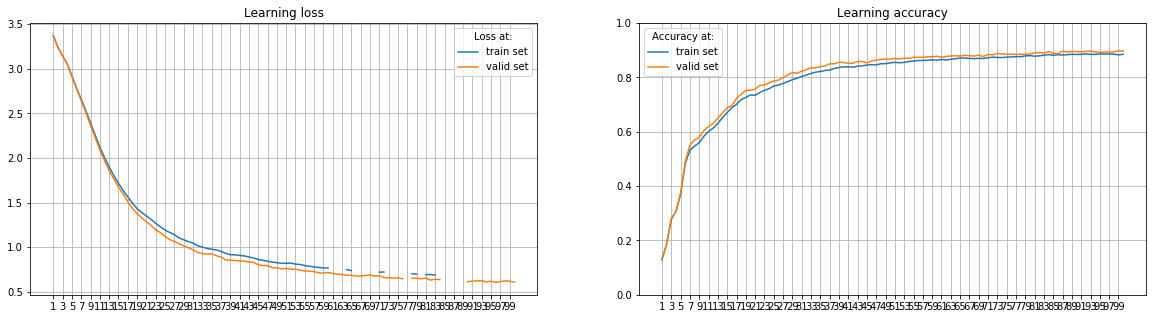

In [30]:
s = tf.InteractiveSession()
s.run(tf.global_variables_initializer())
np.random.seed(42)

loss_test, loss_train  = [ ], [ ]
acc_test, acc_train = [ ], [ ]
for i in range(epochs):
    # выбираем рандомный батч
    ind = np.random.choice(X_train.shape[0], batch_size)
    s.run(optimizer, {input_X: X_train[ind,:], input_y: y_train[ind], keep_probability: 0.5})
    # находим потери
    loss_train.append(s.run(loss, {input_X: X_train, input_y: y_train, keep_probability: 0.5}))
    loss_test.append(s.run(loss, {input_X: X_val, input_y: y_val, keep_probability: 0.5}))
    # находим точность
    acc_train.append(s.run(accuracy, {input_X: X_train, input_y: y_train, keep_probability: 0.5}))
    acc_test.append(s.run(accuracy, {input_X: X_val, input_y: y_val, keep_probability: 0.5}))
    # визуализируем
    visualize(loss_train, loss_test, acc_train, acc_test) 

In [31]:
print("Точность: %s" %s.run(accuracy, {input_X: X_test, input_y: y_test, keep_probability: 0.5}))

Точность: 0.8893


## 4. Можно придумывать свои собственные слои!

In [32]:
# параметры обучения 
epochs =  100
batch_size = 100
lr = 0.001 # скорость обучения

# параметры сетки 
num_input = 784  # (img shape: 28*28)
num_classes = 10 # (0-9 digits)

In [33]:
# полносвязный слой с relu активацией 
def fullyconnected_layer(x, input_size, out_size):
    W = tf.Variable(tf.truncated_normal([input_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.nn.relu(tf.matmul(x,W) +b)

# самый последний слой 
def softmax_layer(x, input_size, out_size):
    W = tf.Variable(tf.truncated_normal([input_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.nn.softmax(tf.matmul(x,W) +b)

# batchnorm слой 
def batchnorm_layer(x, size):
    batch_mean, batch_var = tf.nn.moments(x, [0])
    beta = tf.Variable(tf.zeros([size]))
    scale = tf.Variable(tf.ones([size]))
    return tf.nn.batch_normalization(x, batch_mean, batch_var, beta, scale, 0.001)

In [34]:
# заглушки для входа 
input_X = tf.placeholder(name='input', shape=[None, num_input], dtype=tf.float32)
input_y = tf.placeholder(name='output', shape=[None, num_classes], dtype = tf.float32)

# архитектура сетки
h1 = fullyconnected_layer(input_X, num_input, 100)
# h1_bn = batchnorm_layer(h1, 100)
h2 = fullyconnected_layer(h1, 100, 100)
pred = softmax_layer(h2, 100, num_classes)

# подсчитываем accuracy 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# функция потерь
loss = -tf.reduce_mean(tf.reduce_sum(input_y * tf.log(pred)
                         + (1 - input_y) * tf.log(1 - pred), axis=1))
# Оптимизатор 
optimizer = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)

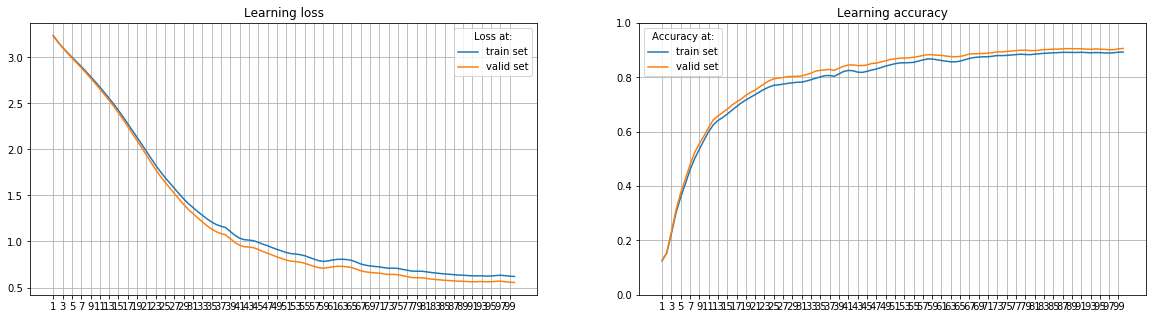

In [35]:
s = tf.InteractiveSession()
s.run(tf.global_variables_initializer())
np.random.seed(42)

loss_test, loss_train  = [ ], [ ]
acc_test, acc_train = [ ], [ ]
for i in range(epochs):
    # выбираем рандомный батч
    ind = np.random.choice(X_train.shape[0], batch_size)
    s.run(optimizer, {input_X: X_train[ind,:], input_y: y_train[ind], keep_probability: 0.5})
    # находим потери
    loss_train.append(s.run(loss, {input_X: X_train, input_y: y_train, keep_probability: 0.5}))
    loss_test.append(s.run(loss, {input_X: X_val, input_y: y_val, keep_probability: 0.5}))
    # находим точность
    acc_train.append(s.run(accuracy, {input_X: X_train, input_y: y_train, keep_probability: 0.5}))
    acc_test.append(s.run(accuracy, {input_X: X_val, input_y: y_val, keep_probability: 0.5}))
    # визуализируем
    visualize(loss_train, loss_test, acc_train, acc_test) 

Точно такая же сетка, но с батч-нормализацией.

In [36]:
# заглушки для входа 
input_X = tf.placeholder(name='input', shape=[None, num_input], dtype=tf.float32)
input_y = tf.placeholder(name='output', shape=[None, num_classes], dtype = tf.float32)

# архитектура сетки
h1 = fullyconnected_layer(input_X, num_input, 100)
h1_bn = batchnorm_layer(h1, 100)
h2 = fullyconnected_layer(h1_bn, 100, 100)
pred = softmax_layer(h2, 100, num_classes)

# подсчитываем accuracy 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# функция потерь
loss = -tf.reduce_mean(tf.reduce_sum(input_y * tf.log(pred)
                         + (1 - input_y) * tf.log(1 - pred), axis=1))
# Оптимизатор 
optimizer = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)

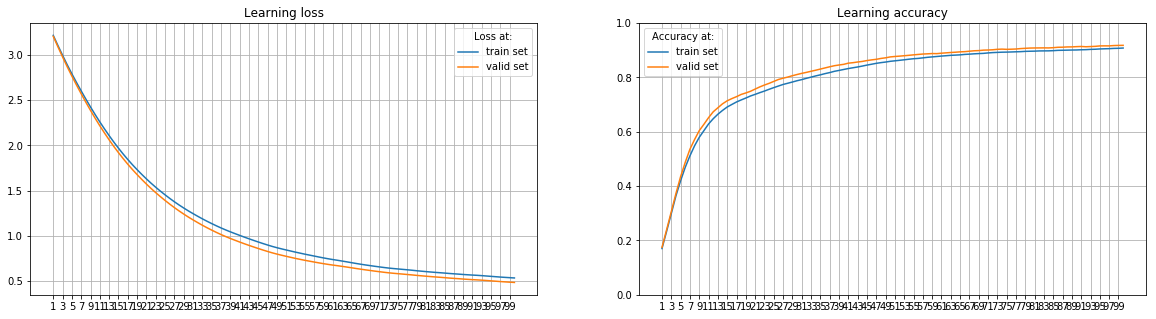

In [37]:
s = tf.InteractiveSession()
s.run(tf.global_variables_initializer())
np.random.seed(42)

loss_test, loss_train  = [ ], [ ]
acc_test, acc_train = [ ], [ ]
for i in range(epochs):
    # выбираем рандомный батч
    ind = np.random.choice(X_train.shape[0], batch_size)
    s.run(optimizer, {input_X: X_train[ind,:], input_y: y_train[ind], keep_probability: 0.5})
    # находим потери
    loss_train.append(s.run(loss, {input_X: X_train, input_y: y_train, keep_probability: 0.5}))
    loss_test.append(s.run(loss, {input_X: X_val, input_y: y_val, keep_probability: 0.5}))
    # находим точность
    acc_train.append(s.run(accuracy, {input_X: X_train, input_y: y_train, keep_probability: 0.5}))
    acc_test.append(s.run(accuracy, {input_X: X_val, input_y: y_val, keep_probability: 0.5}))
    # визуализируем
    visualize(loss_train, loss_test, acc_train, acc_test) 

## 4. Что находят нейроны? 

Давайте попробуем визуализировать веса нашей сетки.

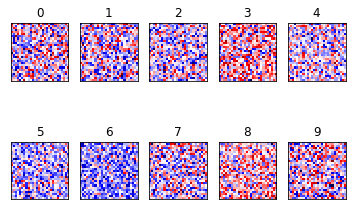

In [38]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = s.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

Посмотрим на линейную модель

In [39]:
# заглушки для входа 
input_X = tf.placeholder(name='input', shape=[None, num_input], dtype=tf.float32)
input_y = tf.placeholder(name='output', shape=[None, num_classes], dtype = tf.float32)

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# архитектура сетки
pred = tf.nn.softmax(tf.matmul(input_X, W) + b)

# подсчитываем accuracy 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# функция потерь
loss = -tf.reduce_mean(tf.reduce_sum(input_y * tf.log(pred)
                         + (1 - input_y) * tf.log(1 - pred), axis=1))
# Оптимизатор 
optimizer = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)

s = tf.InteractiveSession()
s.run(tf.global_variables_initializer())
np.random.seed(42)

for i in range(1000):
    # выбираем рандомный батч
    ind = np.random.choice(X_train.shape[0], batch_size)
    s.run(optimizer, {input_X: X_train[ind,:], input_y: y_train[ind], keep_probability: 0.5})

In [ ]:
pred.eval(input_X: [12,2,2,2])

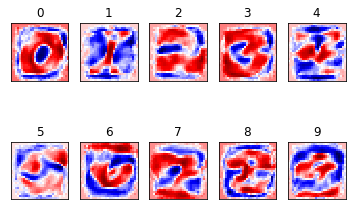

In [40]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = s.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

## Почиташки

* [Туториал с Хабра.](https://habrahabr.ru/company/ods/blog/324898/) Из него я украл начало этой тетрадки.